In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np
import imageio
from torch import nn
%matplotlib inline

In [2]:
x = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1) 

y = torch.sin(x)

In [3]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x)*(1- sigmoid(x))

def neural_network(x,weights,bias):
    s_z = sigmoid(torch.matmul(x,weights[0])+bias[0])
    return torch.matmul(s_z, weights[1]) + bias[1]

def dN_dx(weights, x):
    s_z_grad = sigmoid_grad(torch.matmul(x,weights[0])+bias[0]) #100x10
    mul=torch.mul(weights[0].T,weights[1])
    return torch.matmul(s_z_grad,mul)

In [4]:
def error(pred,target): return ((pred-target)**2).mean() 

In [5]:
#initialize weights and biases
weights = [torch.randn((1,10),  requires_grad=True), torch.randn((10,1),  requires_grad=True)]
bias = [torch.randn(10,  requires_grad=True), torch.randn(1,  requires_grad=True)]


In [61]:
epochs=50000
lr=0.01
for i in range(epochs):
    pred = neural_network(x,weights,bias)
    loss = error(pred,y)
    loss.backward()
    weights[0].data -= lr*weights[0].grad.data
    weights[1].data -= lr*weights[1].grad.data
    bias[0].data -= lr*bias[0].grad.data
    bias[1].data -= lr*bias[1].grad.data

 
    weights[0].grad.zero_()
    weights[1].grad.zero_()
    bias[0].grad.zero_()
    bias[1].grad.zero_()

    print("Loss: ", loss.item())

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Loss:  0.0008137496770359576
Loss:  0.0008137497934512794
Loss:  0.0008137459517456591
Loss:  0.0008137502591125667
Loss:  0.0008137463591992855
Loss:  0.0008137378608807921
Loss:  0.0008137409458868206
Loss:  0.0008137401891872287
Loss:  0.0008137367549352348
Loss:  0.0008137348340824246
Loss:  0.0008137293043546379
Loss:  0.0008137279655784369
Loss:  0.0008137261029332876
Loss:  0.0008137241820804775
Loss:  0.0008137237746268511
Loss:  0.0008137199329212308
Loss:  0.0008137162658385932
Loss:  0.0008137174881994724
Loss:  0.0008137156255543232
Loss:  0.000813713064417243
Loss:  0.0008137114346027374
Loss:  0.0008137100958265364
Loss:  0.0008137098629958928
Loss:  0.0008137061377055943
Loss:  0.0008137044496834278
Loss:  0.0008137004333548248
Loss:  0.000813700957223773
Loss:  0.0008136993856169283
Loss:  0.0008136947290040553
Loss:  0.0008136967080645263
Loss:  0.0008136916439980268
Loss:  0.000813694205135107
Loss:  0.00081368861

In [62]:
N=neural_network(x,weights,bias)
error(N,y)

tensor(0.0008, grad_fn=<MeanBackward0>)

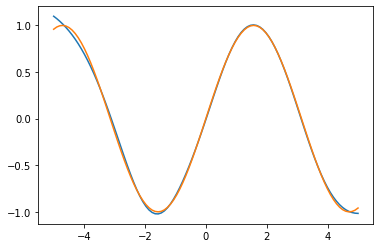

In [64]:
plt.plot(x.data.numpy(), N.data.numpy())
plt.plot(x,y)

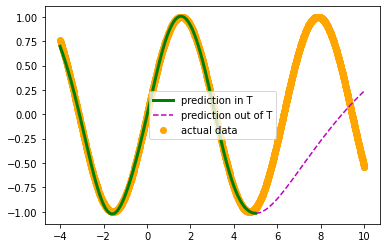

In [78]:
#predictions
x = torch.unsqueeze(torch.linspace(-4, 5, 800), dim=1) 
y = torch.sin(x)
N = neural_network(x, weights,bias)
fig, ax = plt.subplots()
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), N.data.numpy(), 'g-', lw=3, label ='prediction in T')
x = torch.unsqueeze(torch.linspace(5, 10, 800), dim=1) #OUT OF T
N = neural_network(x, weights,bias)
y = torch.sin(x)
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange", label ='actual data')

ax.plot(x.data.numpy(), N.data.numpy(), 'm--', label ='prediction out of T')
plt.legend()

In [79]:
#second approach

In [80]:
net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.Sigmoid(),
        torch.nn.Linear(10, 1),
    )

In [81]:
def loss(x):

    x.requires_grad = True
    N = neural_network(x, weights, bias)
    dNx_dx = dN_dx(weights, x)

    return  torch.mean( ( dNx_dx - net1(x)*N )  ** 2)

In [82]:
optimizer = torch.optim.Adam(net1.parameters(), lr=0.01)

In [83]:
x = torch.unsqueeze(torch.linspace(-4, 5, 800), dim=1)  #train net1 in (-4, 8)

In [93]:
def closure():
    
    l = loss(x)
    #losses.append(l)
    
    optimizer.zero_grad()
    l.backward()
    print(f"loss: {l}")
    return l

for i in range(20000):
    optimizer.step(closure)

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
loss: 0.015148059464991093
loss: 0.015148036181926727
loss: 0.015148025006055832
loss: 0.015148012898862362
loss: 0.015147999860346317
loss: 0.015147991478443146
loss: 0.015147984027862549
loss: 0.015147978439927101
loss: 0.015147965401411057
loss: 0.015147951431572437
loss: 0.015147938393056393
loss: 0.015147920697927475
loss: 0.01514790765941143
loss: 0.01514789741486311
loss: 0.015147886238992214
loss: 0.015147874131798744
loss: 0.015147864818572998
loss: 0.015147850848734379
loss: 0.015147844329476357
loss: 0.015147830359637737
loss: 0.015147817321121693
loss: 0.015147804282605648
loss: 0.015147791244089603
loss: 0.015147779136896133
loss: 0.015147767029702663
loss: 0.015147757716476917
loss: 0.015147746540606022
loss: 0.015147740952670574
loss: 0.015147723257541656
loss: 0.015147712081670761
loss: 0.015147706493735313
loss: 0.015147688798606396
loss: 0.015147678554058075
loss: 0.015147664584219456
loss: 0.015147650614380836
lo

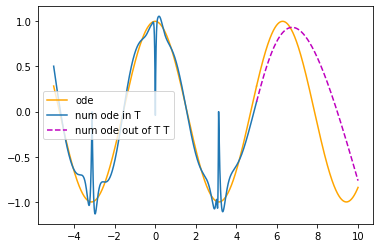

In [107]:
#check if cos is the same with O.D.E
x = torch.unsqueeze(torch.linspace(-5,5, 2000), dim=1) 
dy = torch.cos(x)

method_dy = net1(x)* neural_network(x,weights,bias)
method_dy = method_dy.detach().numpy()
plt.plot(x.data.numpy(), dy.data.numpy(),'orange', label='ode')
plt.plot(x.data.numpy(), method_dy, label='num ode in T')

x = torch.unsqueeze(torch.linspace(5,10, 2000), dim=1) 
dy = torch.cos(x)

method_dy = net1(x)* neural_network(x,weights,bias)
method_dy = method_dy.detach().numpy()
plt.plot(x.data.numpy(), dy.data.numpy(), 'orange')
plt.plot(x.data.numpy(), method_dy, 'm--', label='num ode out of T T')

plt.legend()
plt.show()

In [ ]:
#solution

In [116]:
x = torch.Tensor(np.linspace(-4, 13, 300)[:, None]) 

In [117]:
NN = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1))
A = neural_network(x[0],weights,bias)
Psi_t = lambda x: A + (x+4)*NN(x) #NN is responsible for the solution of O.D.E
f = lambda x: net1(x)*neural_network(x,weights,bias) #they are both trained. 

In [118]:
def loss_fun(x):

    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]

    return  torch.mean( ( Psi_t_x - f(x) )  ** 2)

In [120]:
optimizer = torch.optim.Adam(NN.parameters(), lr=0.0001)

In [134]:
def closure():

    optimizer.zero_grad()
    l = loss_fun(x)
    print(l)
    #l.backward()
    l.backward(retain_graph=True)
    return l

for i in range(500):
    optimizer.step(closure)

tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)


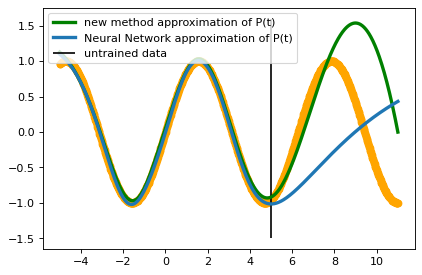

In [174]:
x = torch.unsqueeze(torch.linspace(-5, 11, 800), dim=1) 
y = torch.sin(x)  
p_t_second = Psi_t(x)
p_t_first = neural_network(x,weights,bias)
fig, ax = plt.subplots(dpi=80)
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), p_t_second.data.numpy(), 'g-', lw=3, label ='new method approximation of P(t)')
ax.plot(x.data.numpy(), p_t_first.data.numpy(), lw=3, label ='Neural Network approximation of P(t)')

ax.vlines(x=5, ymin=-1.5, ymax=1.6, color='black', label='untrained data')


#ax.plot(x.data.numpy(), yrk, lw=3, label ='RK approximation of P(t)')

plt.legend(loc='best');

In [175]:
#RK method
#x = torch.unsqueeze(torch.linspace(-5,11, 2000), dim=1) 
N = len(x)
h = (11+5)/N

In [176]:
y = torch.sin(x)

In [177]:
yrk = np.zeros(int(N))
yrk[0]=neural_network(x[0],weights,bias)
for i in range(0,int(N-1)):
    k1 = net1(x[i])*neural_network(x[i],weights,bias)
    k2 = net1(x[i]+(h/2))*neural_network(x[i]+(h/2), weights,bias)
    k3 = net1(x[i]+(h/2))*neural_network(x[i]+(h/2), weights,bias)
    k4 = net1(x[i]+h)*neural_network(x[i]+h, weights,bias)

    yrk[i+1] = yrk[i] + (1/6)*h*(k1+2*k2+2*k3+k4)

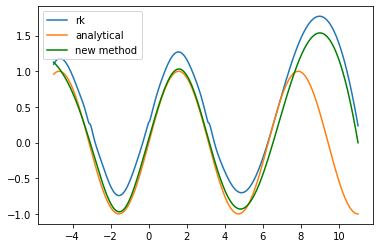

In [180]:
plt.plot(x,yrk, label ='rk')
plt.plot(x,y, label ='analytical')
plt.plot(x.data.numpy(), p_t_second.data.numpy(), 'g-', label ='new method')

plt.legend()
plt.show()